# Example of extremes in LocalizeSL

First, initialize the environment to load the core files.

In [1]:
    rootdir='~/Dropbox/Code/LocalizeSL';
    addpath(fullfile(rootdir,'MFILES'));
    
    extremesIFILES = fullfile(rootdir,'IFILES/extremes');
    datDir = fullfile(extremesIFILES, 'declustered');
    
    % import table of calibration parameters
    parmdat=importdata(fullfile(extremesIFILES,'GPDfits_withunc.tsv'),'\t',1);
    extracols=size(parmdat.textdata,2)-size(parmdat.data,2);
    lambdas=parmdat.data(:,find(strcmpi('lambda',parmdat.textdata(1,:)))-extracols);
    thresholds=parmdat.data(:,find(strcmpi('u',parmdat.textdata(1,:)))-extracols);
    scales=parmdat.data(:,find(strcmpi('scale',parmdat.textdata(1,:)))-extracols);;
    shapes=parmdat.data(:,find(strcmpi('shape',parmdat.textdata(1,:)))-extracols);
    AEP10pts=parmdat.data(:,find(strcmpi('AEP0.1',parmdat.textdata(1,:)))-extracols);
    Vscale=parmdat.data(:,find(strcmpi('Vscale',parmdat.textdata(1,:)))-extracols);
    Vshape=parmdat.data(:,find(strcmpi('Vshape',parmdat.textdata(1,:)))-extracols);
    Vscaleshape=parmdat.data(:,find(strcmpi('Vscaleshape',parmdat.textdata(1,:)))-extracols);
    psmslids=parmdat.data(:,1);
    tgids=parmdat.data(:,2);
    NOAAnames=parmdat.textdata(2:end,1);


Then, specify the site of interest using the PSMSL ID. See http://www.psmsl.org/data/obtaining/ for an index.

In [2]:
    selectedSite=180;
    qqq=find(psmslids==selectedSite);
    
    longname=NOAAnames{qqq};
    shortname=longname(setdiff(1:length(longname),strfind(longname,' ')));
    shortname(strfind(shortname,','))='-';

Load historical flood data and sample extreme value parameters.

In [3]:
wfile=fullfile(datDir,['maxtofit.dclist.' num2str(tgids(qqq)) '_xdat.dc.tsv']);
historicaldata=importdata(wfile);


In [4]:
    acov = [Vscale(qqq) Vscaleshape(qqq) ; Vscaleshape(qqq) Vshape(qqq)];
    parmsamps=lhsnorm([scales(qqq) shapes(qqq)],acov,1000);
    parmsamps(:,1)=max(eps,parmsamps(:,1));


## DP16, RCP 8.5

Load the corefile for the data set of interest. In this case, we will use the corefile containing the DP16 projections from Kopp et al. (2017), for RCP 8.5.

In [5]:
    corefile=load(fullfile(rootdir,'IFILES/SLRProjections170113GRIDDEDcore-DP16-Pl5_15-BC.mat'));
    ccclab='DP16';
        
    selscen=1;

In [6]:
   [sampslocrise,~,siteids,sitenames,targyears,scens,cols] = LocalizeStoredProjections(selectedSite,corefile,selscen);
    samps=[zeros(size(sampslocrise{1,1},1),1) sampslocrise{1,1}]/1000; % add base year and convert to meters
    samps=bsxfun(@min,samps,quantile(samps,.999)); % truncate samples viewed as physically implausible
    targyears = [2000 targyears];


Region 180 (ATLANTIC CITY)- median in rcp85 2100 of 1823.05 mm


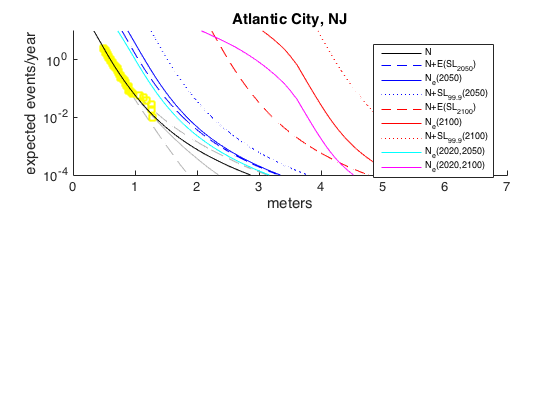

In [7]:
clear pm;
pm.showuncertainty=1; pm.historicaldata=historicaldata;
     [effcurve{qqq},testz,histcurve{qqq},histcurvesamps,effcurveESLR,effcurve999{qqq},integratecurve]= ...
     SLRFloodNexpVsLevelCurves(samps,targyears,thresholds(qqq), ...
     parmsamps(:,1),parmsamps(:,2),lambdas(qqq),longname,pm);     
      

In [8]:
fid=fopen(['ExpectedFrequency-' ccclab '-' scens{1} '.tsv'],'w');
fprintf(fid,'Site\tScenario\tHeight (m)');
fprintf(fid,'\t%0.0f',2000:10:2200);
fprintf(fid,'\n');

targlevs=[1 .1 .01 .002];
targhts=[0.3:0.3:6];
[targhts2,targhtsi]=intersect(testz,targhts);
clear targrp;
for www=1:length(targlevs)
    [m,mi]=min(abs(histcurve{qqq}-targlevs(www)));
    targrp(www,:) = effcurve{qqq}(:,mi);
    fprintf(fid,longname);
    fprintf(fid,['\t' scens{1}]);
    fprintf(fid,'\t%0.2f',testz(mi));
    fprintf(fid,'\t%0.3g',targrp(www,:));
    fprintf(fid,'\n');
end
for www=1:length(targhts2)
    mi=targhtsi(www);
    targrp(www,:) = effcurve{qqq}(:,mi);
    fprintf(fid,longname);
    fprintf(fid,['\t' scens{1}]);
    fprintf(fid,'\t%0.2f',testz(mi));
    fprintf(fid,'\t%0.3g',targrp(www,:));
    fprintf(fid,'\n');
end
fclose(fid);



## DP16, RCP 2.6

Use the corefile containing the DP16 projections from Kopp et al. (2017), for RCP 2.6.

In [9]:
    corefile=load(fullfile(rootdir,'IFILES/SLRProjections170113GRIDDEDcore-DP16-Pl5_15-BC.mat'));
    ccclab='DP16';
        
    selscen=4;

In [10]:
   [sampslocrise,~,siteids,sitenames,targyears,scens,cols] = LocalizeStoredProjections(selectedSite,corefile,selscen);
    samps=[zeros(size(sampslocrise{1,1},1),1) sampslocrise{1,1}]/1000; % add base year and convert to meters
    samps=bsxfun(@min,samps,quantile(samps,.999)); % truncate samples viewed as physically implausible
    targyears = [2000 targyears];


Region 180 (ATLANTIC CITY)- median in rcp26 2100 of 768.97 mm


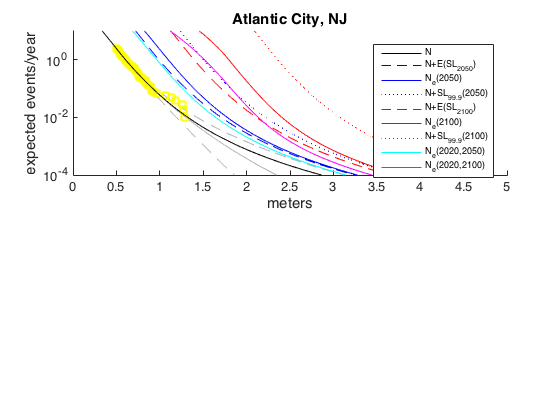

In [11]:
clear pm;
pm.showuncertainty=1; pm.historicaldata=historicaldata;
     [effcurve{qqq},testz,histcurve{qqq},histcurvesamps,effcurveESLR,effcurve999{qqq},integratecurve]= ...
     SLRFloodNexpVsLevelCurves(samps,targyears,thresholds(qqq), ...
     parmsamps(:,1),parmsamps(:,2),lambdas(qqq),longname,pm);     
      

In [12]:
fid=fopen(['ExpectedFrequency-' ccclab '-' scens{1} '.tsv'],'w');
fprintf(fid,'Site\tScenario\tHeight (m)');
fprintf(fid,'\t%0.0f',2000:10:2200);
fprintf(fid,'\n');

targlevs=[1 .1 .01 .002];
targhts=[0.3:0.3:6];
[targhts2,targhtsi]=intersect(testz,targhts);
clear targrp;
for www=1:length(targlevs)
    [m,mi]=min(abs(histcurve{qqq}-targlevs(www)));
    targrp(www,:) = effcurve{qqq}(:,mi);
    fprintf(fid,longname);
    fprintf(fid,['\t' scens{1}]);
    fprintf(fid,'\t%0.2f',testz(mi));
    fprintf(fid,'\t%0.3g',targrp(www,:));
    fprintf(fid,'\n');
end
for www=1:length(targhts2)
    mi=targhtsi(www);
    targrp(www,:) = effcurve{qqq}(:,mi);
    fprintf(fid,longname);
    fprintf(fid,['\t' scens{1}]);
    fprintf(fid,'\t%0.2f',testz(mi));
    fprintf(fid,'\t%0.3g',targrp(www,:));
    fprintf(fid,'\n');
end
fclose(fid);



## K14, RCP 8.5

Use the corefile containing the K14 projections from Kopp et al. (2014), for RCP 8.5.

In [13]:
    corefile=load(fullfile(rootdir,'IFILES/SLRProjections170113GRIDDEDcore.mat'));
    ccclab='K14';
        
    selscen=1;

In [14]:
   [sampslocrise,~,siteids,sitenames,targyears,scens,cols] = LocalizeStoredProjections(selectedSite,corefile,selscen);
    samps=[zeros(size(sampslocrise{1,1},1),1) sampslocrise{1,1}]/1000; % add base year and convert to meters
    samps=bsxfun(@min,samps,quantile(samps,.999)); % truncate samples viewed as physically implausible
    targyears = [2000 targyears];


Region 180 (ATLANTIC CITY)- median in rcp85 2100 of 1028.44 mm


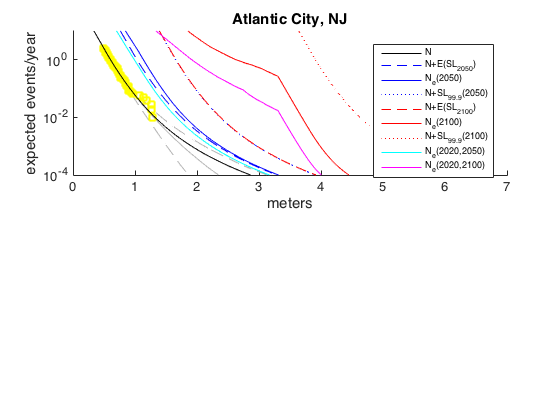

In [15]:
clear pm;
pm.showuncertainty=1; pm.historicaldata=historicaldata;
     [effcurve{qqq},testz,histcurve{qqq},histcurvesamps,effcurveESLR,effcurve999{qqq},integratecurve]= ...
     SLRFloodNexpVsLevelCurves(samps,targyears,thresholds(qqq), ...
     parmsamps(:,1),parmsamps(:,2),lambdas(qqq),longname,pm);     
      

In [16]:
fid=fopen(['ExpectedFrequency-' ccclab '-' scens{1} '.tsv'],'w');
fprintf(fid,'Site\tScenario\tHeight (m)');
fprintf(fid,'\t%0.0f',2000:10:2200);
fprintf(fid,'\n');

targlevs=[1 .1 .01 .002];
targhts=[0.3:0.3:6];
[targhts2,targhtsi]=intersect(testz,targhts);
clear targrp;
for www=1:length(targlevs)
    [m,mi]=min(abs(histcurve{qqq}-targlevs(www)));
    targrp(www,:) = effcurve{qqq}(:,mi);
    fprintf(fid,longname);
    fprintf(fid,['\t' scens{1}]);
    fprintf(fid,'\t%0.2f',testz(mi));
    fprintf(fid,'\t%0.3g',targrp(www,:));
    fprintf(fid,'\n');
end
for www=1:length(targhts2)
    mi=targhtsi(www);
    targrp(www,:) = effcurve{qqq}(:,mi);
    fprintf(fid,longname);
    fprintf(fid,['\t' scens{1}]);
    fprintf(fid,'\t%0.2f',testz(mi));
    fprintf(fid,'\t%0.3g',targrp(www,:));
    fprintf(fid,'\n');
end
fclose(fid);



## K14, RCP 2.6

Use the corefile containing the K14 projections from Kopp et al. (2014), for RCP 2.6.

In [17]:
    corefile=load(fullfile(rootdir,'IFILES/SLRProjections170113GRIDDEDcore.mat'));
    ccclab='K14';
        
    selscen=4;

In [18]:
   [sampslocrise,~,siteids,sitenames,targyears,scens,cols] = LocalizeStoredProjections(selectedSite,corefile,selscen);
    samps=[zeros(size(sampslocrise{1,1},1),1) sampslocrise{1,1}]/1000; % add base year and convert to meters
    samps=bsxfun(@min,samps,quantile(samps,.999)); % truncate samples viewed as physically implausible
    targyears = [2000 targyears];


Region 180 (ATLANTIC CITY)- median in rcp26 2100 of 696.91 mm


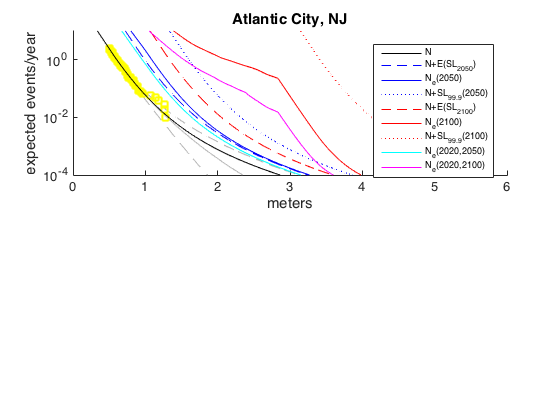

In [19]:
clear pm;
pm.showuncertainty=1; pm.historicaldata=historicaldata;
     [effcurve{qqq},testz,histcurve{qqq},histcurvesamps,effcurveESLR,effcurve999{qqq},integratecurve]= ...
     SLRFloodNexpVsLevelCurves(samps,targyears,thresholds(qqq), ...
     parmsamps(:,1),parmsamps(:,2),lambdas(qqq),longname,pm);     
      

In [20]:
fid=fopen(['ExpectedFrequency-' ccclab '-' scens{1} '.tsv'],'w');
fprintf(fid,'Site\tScenario\tHeight (m)');
fprintf(fid,'\t%0.0f',2000:10:2200);
fprintf(fid,'\n');

targlevs=[1 .1 .01 .002];
targhts=[0.3:0.3:6];
[targhts2,targhtsi]=intersect(testz,targhts);
clear targrp;
for www=1:length(targlevs)
    [m,mi]=min(abs(histcurve{qqq}-targlevs(www)));
    targrp(www,:) = effcurve{qqq}(:,mi);
    fprintf(fid,longname);
    fprintf(fid,['\t' scens{1}]);
    fprintf(fid,'\t%0.2f',testz(mi));
    fprintf(fid,'\t%0.3g',targrp(www,:));
    fprintf(fid,'\n');
end
for www=1:length(targhts2)
    mi=targhtsi(www);
    targrp(www,:) = effcurve{qqq}(:,mi);
    fprintf(fid,longname);
    fprintf(fid,['\t' scens{1}]);
    fprintf(fid,'\t%0.2f',testz(mi));
    fprintf(fid,'\t%0.3g',targrp(www,:));
    fprintf(fid,'\n');
end
fclose(fid);



## R18, 1.5 C

Use the corefile containing the 1.5C projections from Rasmussen et al. (2018).

In [21]:
    corefile=load(fullfile(rootdir,'IFILES/SLRProjections180124GRIDDEDcore_Tscens.mat'));
    ccclab='R18';
        
    selscen=1;

In [22]:
   [sampslocrise,~,siteids,sitenames,targyears,scens,cols] = LocalizeStoredProjections(selectedSite,corefile,selscen);
    samps=[zeros(size(sampslocrise{1,1},1),1) sampslocrise{1,1}]/1000; % add base year and convert to meters
    samps=bsxfun(@min,samps,quantile(samps,.999)); % truncate samples viewed as physically implausible
    targyears = [2000 targyears];


Region 180 (ATLANTIC CITY)- median in 1p5degree 2100 of 644.31 mm


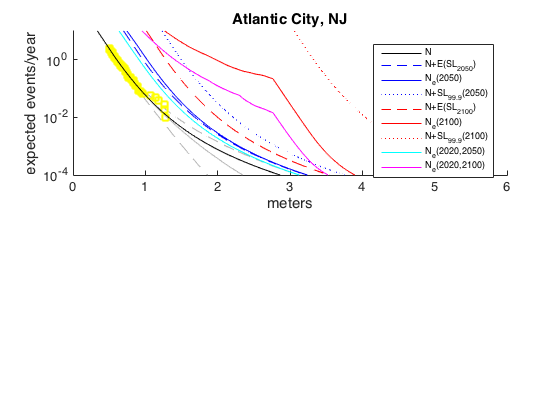

In [23]:
clear pm;
pm.showuncertainty=1; pm.historicaldata=historicaldata;
     [effcurve{qqq},testz,histcurve{qqq},histcurvesamps,effcurveESLR,effcurve999{qqq},integratecurve]= ...
     SLRFloodNexpVsLevelCurves(samps,targyears,thresholds(qqq), ...
     parmsamps(:,1),parmsamps(:,2),lambdas(qqq),longname,pm);     
      

In [24]:
fid=fopen(['ExpectedFrequency-' ccclab '-' scens{1} '.tsv'],'w');
fprintf(fid,'Site\tScenario\tHeight (m)');
fprintf(fid,'\t%0.0f',2000:10:2200);
fprintf(fid,'\n');

targlevs=[1 .1 .01 .002];
targhts=[0.3:0.3:6];
[targhts2,targhtsi]=intersect(testz,targhts);
clear targrp;
for www=1:length(targlevs)
    [m,mi]=min(abs(histcurve{qqq}-targlevs(www)));
    targrp(www,:) = effcurve{qqq}(:,mi);
    fprintf(fid,longname);
    fprintf(fid,['\t' scens{1}]);
    fprintf(fid,'\t%0.2f',testz(mi));
    fprintf(fid,'\t%0.3g',targrp(www,:));
    fprintf(fid,'\n');
end
for www=1:length(targhts2)
    mi=targhtsi(www);
    targrp(www,:) = effcurve{qqq}(:,mi);
    fprintf(fid,longname);
    fprintf(fid,['\t' scens{1}]);
    fprintf(fid,'\t%0.2f',testz(mi));
    fprintf(fid,'\t%0.3g',targrp(www,:));
    fprintf(fid,'\n');
end
fclose(fid);



## R18, 2.0 C

Use the corefile containing the 2.0C projections from Rasmussen et al. (2018).

In [25]:
    corefile=load(fullfile(rootdir,'IFILES/SLRProjections180124GRIDDEDcore_Tscens.mat'));
    ccclab='R18';
        
    selscen=2;

In [26]:
   [sampslocrise,~,siteids,sitenames,targyears,scens,cols] = LocalizeStoredProjections(selectedSite,corefile,selscen);
    samps=[zeros(size(sampslocrise{1,1},1),1) sampslocrise{1,1}]/1000; % add base year and convert to meters
    samps=bsxfun(@min,samps,quantile(samps,.999)); % truncate samples viewed as physically implausible
    targyears = [2000 targyears];


Region 180 (ATLANTIC CITY)- median in 2p0degree 2100 of 791.76 mm


In [ ]:
clear pm;
pm.showuncertainty=1; pm.historicaldata=historicaldata;
     [effcurve{qqq},testz,histcurve{qqq},histcurvesamps,effcurveESLR,effcurve999{qqq},integratecurve]= ...
     SLRFloodNexpVsLevelCurves(samps,targyears,thresholds(qqq), ...
     parmsamps(:,1),parmsamps(:,2),lambdas(qqq),longname,pm);     
      

In [ ]:
fid=fopen(['ExpectedFrequency-' ccclab '-' scens{1} '.tsv'],'w');
fprintf(fid,'Site\tScenario\tHeight (m)');
fprintf(fid,'\t%0.0f',2000:10:2200);
fprintf(fid,'\n');

targlevs=[1 .1 .01 .002];
targhts=[0.3:0.3:6];
[targhts2,targhtsi]=intersect(testz,targhts);
clear targrp;
for www=1:length(targlevs)
    [m,mi]=min(abs(histcurve{qqq}-targlevs(www)));
    targrp(www,:) = effcurve{qqq}(:,mi);
    fprintf(fid,longname);
    fprintf(fid,['\t' scens{1}]);
    fprintf(fid,'\t%0.2f',testz(mi));
    fprintf(fid,'\t%0.3g',targrp(www,:));
    fprintf(fid,'\n');
end
for www=1:length(targhts2)
    mi=targhtsi(www);
    targrp(www,:) = effcurve{qqq}(:,mi);
    fprintf(fid,longname);
    fprintf(fid,['\t' scens{1}]);
    fprintf(fid,'\t%0.2f',testz(mi));
    fprintf(fid,'\t%0.3g',targrp(www,:));
    fprintf(fid,'\n');
end
fclose(fid);

